In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = pd.read_csv('dataset/emails.csv')
dataset.shape

(5728, 2)

In [5]:
dataset.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


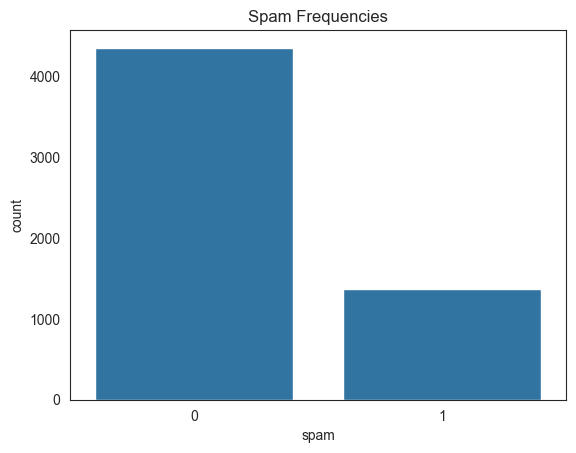

In [ ]:
plt.figure(dpi=100)
sns.countplot(x='spam', data=dataset)
plt.title("Spam Frequencies")
plt.show()

In [ ]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer=process)
message = tfidf_vectorizer.fit_transform(dataset['text'])

In [ ]:
dump(tfidf_vectorizer, open("vectorizer.pkl", "wb"))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

In [ ]:
# Model creation
NB_model = MultinomialNB()

In [15]:
# Model training
NB_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
dump(NB_model, open("NB_model.pkl", 'wb'))

In [ ]:
y_pred = NB_model.predict(X_test)

In [18]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

90.34240561896401

In [19]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94       870\n           1       0.99      0.59      0.74       269\n\n    accuracy                           0.90      1139\n   macro avg       0.94      0.80      0.84      1139\nweighted avg       0.91      0.90      0.89      1139\n'

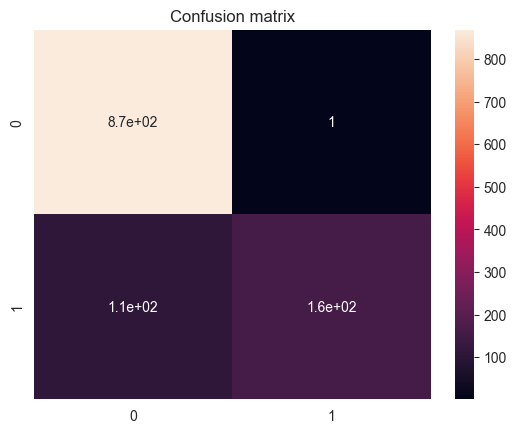

In [20]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [21]:
# Use Support Vector Machine (SVM) for spam detection
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create and train the SVM model
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(probability=True, kernel='linear'))
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")

SVM Model Accuracy: 97.54%


In [22]:
dump(svm_model, open("SVM_model.pkl", 'wb'))

In [23]:
# Use Logistic Regression for spam detection
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Model Accuracy: {logistic_accuracy * 100:.2f}%")

Logistic Regression Model Accuracy: 97.10%


In [24]:
dump(logistic_model, open("LOGISTIC_model.pkl", 'wb'))

In [25]:
# Use Random Forest for spam detection
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_predictions = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Model Accuracy: 96.84%


In [26]:
dump(random_forest_model, open("RANDOM_FOREST_model.pkl", 'wb'))

In [101]:
# Read an external text file and predict if it's spam or not
file_path =r"C:\Users\RAVI\OneDrive\Desktop\Email_Spam_Classifier\test\spam\test2.txt"
with open(file_path, 'r') as file:
    email_content = file.read()
email_vectorized_spam = tfidf_vectorizer.transform([email_content])

In [102]:
# Display non-zero elements with their indices
print("\nNon-zero elements:")
print(email_vectorized_spam)


Non-zero elements:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34 stored elements and shape (1, 37229)>
  Coords	Values
  (0, 640)	0.17590905932026143
  (0, 1113)	0.11816165030240029
  (0, 1595)	0.2876523851956724
  (0, 3638)	0.03240764159875087
  (0, 3921)	0.14941759806386007
  (0, 5859)	0.17360968089006243
  (0, 6313)	0.20242856700125944
  (0, 7893)	0.1657624928679859
  (0, 8768)	0.1833797874285865
  (0, 10538)	0.1194712281380252
  (0, 10801)	0.15092520205772397
  (0, 14316)	0.25458665404286557
  (0, 14515)	0.1727337453624247
  (0, 14729)	0.20242856700125944
  (0, 15259)	0.10143099808176106
  (0, 15877)	0.1983723247230328
  (0, 17389)	0.14127309014353748
  (0, 20759)	0.13771163063024433
  (0, 21163)	0.2155687349056276
  (0, 22577)	0.1833797874285865
  (0, 22834)	0.24959099405882
  (0, 23153)	0.12969773302917442
  (0, 23455)	0.08348033762613616
  (0, 24530)	0.11659575916764642
  (0, 25364)	0.14143717981865148
  (0, 26919)	0.23212338864009419
  (0, 28057)	0.118241966

In [104]:
# Check the frequency of a specific word in the vectorized email
word = 'winner' 
if word in tfidf_vectorizer.vocabulary_:
    word_index = tfidf_vectorizer.vocabulary_[word]
    frequency = email_vectorized_spam.toarray()[0][word_index]
    print(f"The word '{word}' appears with a frequency of {frequency}.")
else:
    print(f"The word '{word}' is not in the vocabulary.")

The word 'winner' appears with a frequency of 0.21103937996798822.


In [111]:
print(process(email_content))

['Subject', 'ðŸš€', 'Youâ€™ve', '35', 'BTC', 'Claim', 'Hi', 'Youâ€™ve', 'selected', 'database', 'lucky', 'winner', '35', 'Bitcoin', 'â€“', 'currently', 'worth', '180000', 'need', 'pay', 'small', 'unlocking', 'fee', '150', 'receive', 'prize', 'Transfer', 'via', 'PayPal', 'crypto', 'gift', 'card', 'limitedtime', 'opportunity', 'must', 'act', 'within', '24', 'hours', 'avoid', 'forfeiting', 'win', 'Donâ€™t', 'miss', 'becoming', 'financially', 'free', 'Click', 'claim', 'Bitcoin', 'fake', 'link', 'moon', 'Crypto', 'Rewards', 'Team', 'supportcryptoblessedbiz']


In [136]:
import pickle

# Load the Naive Bayes model from the .pkl file
with open('NB_model.pkl', 'rb') as f:
    NB_model = pickle.load(f)

# Predict using the loaded model
NB_prediction = NB_model.predict(email_vectorized_spam)

# Display result
print("Spam" if NB_prediction[0] == 0 else "Not Spam")

Spam


In [137]:
import pickle

# Load the SVM model from the .pkl file
with open('SVM_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Predict using the loaded SVM model
svm_email_prediction = svm_model.predict(email_vectorized_spam)

# Display result
print("Spam" if svm_email_prediction[0] == 1 else "Not Spam")


Spam


In [126]:
import pickle

# Load the Logistic Regression model from the .pkl file
with open('LOGISTIC_model.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

# Predict using the loaded model
logistic_email_prediction = logistic_model.predict(email_vectorized_spam)

# Display result
print("Spam" if logistic_email_prediction[0] == 1 else "Not Spam")


Spam


In [127]:
import pickle

# Load the Random Forest model from the .pkl file
with open('RANDOM_FOREST_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

# Predict using the loaded Random Forest model
rf_email_prediction = random_forest_model.predict(email_vectorized_spam)

# Display result
print("Spam" if rf_email_prediction[0] == 1 else "Not Spam")


Spam


In [128]:
# Read an external text file and predict if it's spam or not
import pickle

with open('vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer_k = pickle.load(f)

# Step 2: Read the email content from the file
file_path_ham = r"C:\Users\RAVI\OneDrive\Desktop\Email_Spam_Classifier\test\ham\test1.txt"
with open(file_path_ham, 'r', encoding='utf-8') as file_ham:
    email_content_ham = file_ham.read()

# Step 3: Vectorize the email content using the loaded vectorizer
email_vectorized_ham = tfidf_vectorizer.transform([email_content_ham])

In [129]:
# Display non-zero elements with their indices
print("\nNon-zero elements:")
print(email_vectorized_ham)


Non-zero elements:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35 stored elements and shape (1, 37229)>
  Coords	Values
  (0, 3638)	0.031781169580554415
  (0, 7132)	0.2276362121416487
  (0, 8445)	0.1233849356684998
  (0, 8804)	0.1488844449741745
  (0, 9185)	0.11510038338657348
  (0, 10536)	0.11667403004911026
  (0, 10810)	0.24966524023130748
  (0, 11436)	0.22509236127538929
  (0, 11467)	0.2554596325459668
  (0, 12006)	0.20985096788531746
  (0, 14701)	0.1412200327500817
  (0, 14755)	0.15118843681827648
  (0, 14762)	0.193616332110318
  (0, 15931)	0.10018231566644036
  (0, 18477)	0.24966524023130748
  (0, 22082)	0.11441689103141182
  (0, 22204)	0.2716942683209663
  (0, 22675)	0.11127191933451011
  (0, 22715)	0.20695977837511667
  (0, 23455)	0.08186657948107007
  (0, 25248)	0.18634347928987607
  (0, 27080)	0.11309248400022641
  (0, 27625)	0.15047953375609183
  (0, 27954)	0.1320335345231975
  (0, 28642)	0.129279111957063
  (0, 32068)	0.11419228819144059
  (0, 33040)	0.199

In [130]:
print(process(email_content_ham))

['Subject', 'Update', 'AI', 'Project', 'Progress', 'Hey', 'team', 'wanted', 'give', 'quick', 'update', 'AI', 'project', 'finished', 'integrating', 'YOLOv8', 'model', 'detection', 'module', 'it’s', 'working', 'fine', 'test', 'dataset', 'still', 'need', 'work', 'reidentification', 'tracking', 'Let’s', 'meet', 'Thursday', 'class', 'divide', 'tasks', 'Please', 'come', 'parts', 'ready', 'merge', 'final', 'report', 'I’ve', 'uploaded', 'current', 'codebase', 'GitHub', '–', 'check', 'dev', 'branch', 'Cheers', 'Anika']


In [131]:
import pickle
with open('NB_model.pkl', 'rb') as f:
    NB_model = pickle.load(f)

NB_prediction = NB_model.predict(email_vectorized_ham)

print("Spam" if NB_prediction[0] == 1 else "Not Spam")

Not Spam


In [132]:
import pickle

with open('SVM_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

svm_email_prediction = svm_model.predict(email_vectorized_ham)

print("Spam" if svm_email_prediction[0] == 1 else "Not Spam")


Not Spam


In [133]:
import pickle

with open('LOGISTIC_model.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

logistic_email_prediction = logistic_model.predict(email_vectorized_ham)

print("Spam" if logistic_email_prediction[0] == 1 else "Not Spam")


Not Spam


In [134]:
import pickle

with open('RANDOM_FOREST_model.pkl', 'rb') as f:
    random_forest_model = pickle.load(f)

rf_email_prediction = random_forest_model.predict(email_vectorized_ham)

print("Spam" if rf_email_prediction[0] == 1 else "Not Spam")

Not Spam


In [1]:
import numpy as np
from sklearn.linear_model import Perceptron, LogisticRegression

# Sample input features: [obstacle_up, obstacle_down, obstacle_left, obstacle_right]
# 1 means obstacle, 0 means free
X = [
    [1, 0, 0, 0],  # obstacle above → go down
    [0, 1, 0, 0],  # obstacle below → go up
    [0, 0, 1, 0],  # obstacle left  → go right
    [0, 0, 0, 1],  # obstacle right → go left
    [0, 1, 1, 0],  # obstacles below and left → go up or right
    [1, 1, 0, 0],  # obstacles above and below → go left or right
]

# Corresponding outputs: 0 = up, 1 = down, 2 = left, 3 = right
y = [1, 0, 3, 2, 3, 2]

# -------------------- Perceptron Model --------------------
perceptron_model = Perceptron()
perceptron_model.fit(X, y)

# -------------------- Logistic Regression Model --------------------
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_model.fit(X, y)

# Test the models
test_input = [0, 0, 1, 0]  # obstacle on left → should move right
print("Perceptron predicts (0=up, 1=down, 2=left, 3=right):", perceptron_model.predict([test_input])[0])
print("Logistic Regression predicts:", log_reg_model.predict([test_input])[0])


Perceptron predicts (0=up, 1=down, 2=left, 3=right): 3
Logistic Regression predicts: 3


C:\Users\RAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_win(board, player):
    # Rows, columns, and diagonals
    for i in range(3):
        if all([cell == player for cell in board[i]]) or all([board[j][i] == player for j in range(3)]):
            return True
    if board[0][0] == board[1][1] == board[2][2] == player or board[0][2] == board[1][1] == board[2][0] == player:
        return True
    return False

def is_draw(board):
    return all(cell in ['X', 'O'] for row in board for cell in row)

def tic_tac_toe():
    board = [[" " for _ in range(3)] for _ in range(3)]
    current_player = 'X'
    
    while True:
        print_board(board)
        print(f"Player {current_player}'s turn.")
        
        try:
            row = int(input("Enter row (0-2): "))
            col = int(input("Enter column (0-2): "))
        except ValueError:
            print("Invalid input. Try again.")
            continue

        if board[row][col] != " ":
            print("Cell already taken. Try another.")
            continue

        board[row][col] = current_player
        
        if check_win(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break
        elif is_draw(board):
            print_board(board)
            print("It's a draw!")
            break

        current_player = 'O' if current_player == 'X' else 'X'

tic_tac_toe()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data: 1 = disease present, 0 = disease absent
true_labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
predicted_labels = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Medical Expert System Performance Evaluation")
print("============================================")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")

